In [40]:
from ashlar import filepattern, reg 
import os

In [41]:
path = "C:\\Users\\chloe\\wolkovich_s24\\TreeRings\\code\\focus_testng\\different_cookie"
pattern = "focused_{row:01}_{col:01}.tiff" 
overlap = 0.20
pixel_size = 0.78

In [42]:

        # self.metadata = FilePatternMetadata(path, pattern, overlap, pixel_size) #dont need bc reader defines its own metadata object?
reader = filepattern.FilePatternReader(path, pattern, overlap, pixel_size) #in ashlar/filepattern.py pix_sz =1??
edge_aligner = reg.EdgeAligner(reader,filter_sigma=9, max_shift=2000, max_error=3, verbose=True)
mosaics = []
mosaic_args = {}
mosaic_args['verbose'] = True

In [43]:
edge_aligner.run()

    assembling thumbnail 240/240
    using explicit error threshold
    aligning edge 1/657

C:\Users\chloe\anaconda3\envs\ashlar\lib\site-packages\ashlar\reg.py:1367: DataWarning: Some neighboring tiles have zero overlap.
  warnings.warn(message, DataWarning)


    aligning edge 657/657


In [44]:
mosaics.append(reg.Mosaic(edge_aligner, edge_aligner.mosaic_shape, **mosaic_args))

In [45]:
writer_class = reg.PyramidWriter
writer = writer_class(mosaics, "out_m2000_err3.ome.tiff", verbose=True)
writer.run()

Cycle 0:
    Channel 0:
        merging tile 240/240
    Channel 1:
        merging tile 240/240
    Channel 2:
        merging tile 240/240
Generating pyramid
    Level 1 (25406 x 8751)
        processing channel 3/3
    Level 2 (12703 x 4376)
        processing channel 3/3
    Level 3 (6352 x 2188)
        processing channel 3/3
    Level 4 (3176 x 1094)
        processing channel 3/3
    Level 5 (1588 x 547)
        processing channel 3/3
    Level 6 (794 x 274)
        processing channel 3/3


In [46]:
from ashlar import filepattern, thumbnail, reg
import matplotlib.pyplot as plt
from ashlar.scripts.ashlar import process_axis_flip
import seaborn as sns

C:\Users\chloe\anaconda3\envs\ashlar\lib\site-packages\ashlar\reg.py:1469: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\chloe\anaconda3\envs\ashlar\lib\site-packages\ashlar\reg.py:1472: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\chloe\anaconda3\envs\ashlar\lib\site-packag

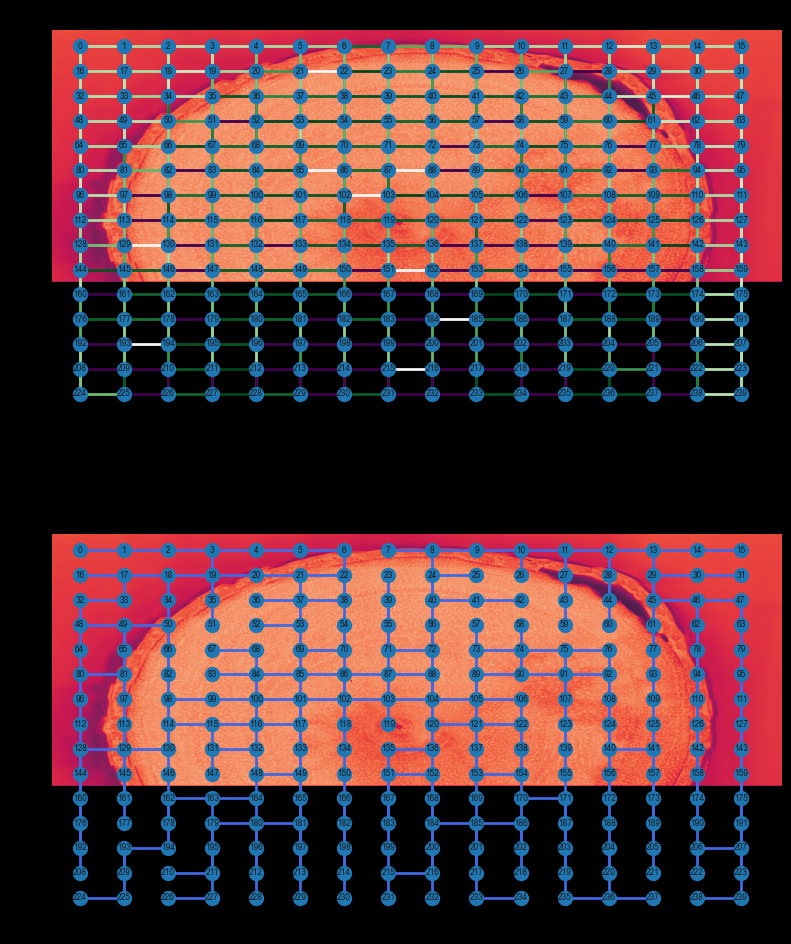

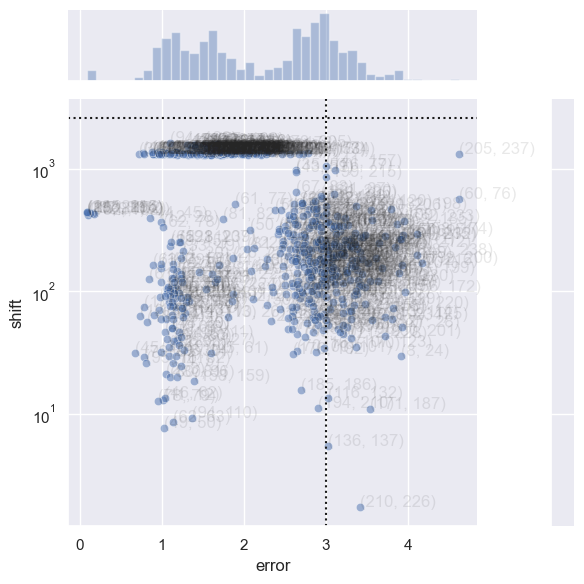

In [48]:
sns.set_theme(rc={'figure.figsize':(15,12)})
edge_qual = reg.plot_edge_quality(edge_aligner, img=edge_aligner.reader.thumbnail)
#plt.gca().subtitle('c1e')

#edge_qual.savefig("edge_quality.png")

# c1e_m = reg.EdgeAligner(c1r, filter_sigma=1, max_shift=30, verbose=True)
# c1e_m.run()
# reg.plot_edge_quality(c1e_m, img=c1e_m.reader.thumbnail)
# #plt.gca().subtitle('c1e_m')

# plot_edge_scatter function requires seaborn
edge_scatter = reg.plot_edge_scatter(edge_aligner)
#plt.gca().subtitle('c1e')
#edge_scatter.savefig("edge_scatter.png")
# reg.plot_edge_scatter(c1e_m)
# #plt.gca().subtitle('c1e_m')